In [5]:
import numpy as np

import matplotlib.pyplot as plt

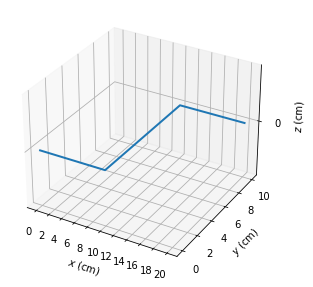

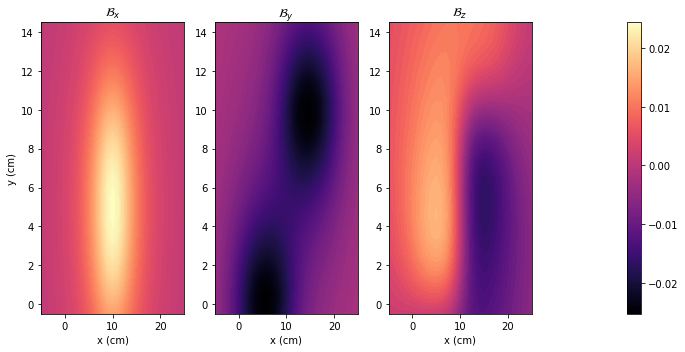

In [11]:

bs.write_target_volume("coil.txt", "coil", (30, 15, 15), (-5, -0.5, -2.5), 1, 1)
# generates a target volume from the coil stored at coil.txt
# uses a 30 x 15 x 15 bounding box, starting at (-5, -0.5, -2.5)
# uses 1 cm resolution

bs.plot_coil("coil.txt")
# plots the coil stored at coil.txt

fields, positions = bs.read_target_volume("coil")
# reads the volume we created

bs.plot_fields(fields, positions, which_plane='z', level=5, num_contours=50)
# plots the fields we just produced
# plotting along the plane x = 5, with 50 contours

# Volumetric Vector Field Analysis
Try to create A volume of Magnetic field vectors to simulate there effects on circuitry. First hurdle is defining the circuit. 

In [60]:
class Field(object):
    def __init__(self,Dim=(10,10,10)):
        self.coords= np.indices(Dim)
        self.create_wire()
    def create_wire(self,corners=[[0,2],[5,2],[5,8],[10,8]]):
        self.wire = self.coords
        for i in range(len(corners)-1):
            self.wire = self.wire | (((self.coords[0] >corners[i][0] )&(self.coords[0] < corners[i+1][0])) & ((self.coords[1] == corners[i][1])&(self.coords[0] < corners[i+1][0])) & (self.coords[2]  == 5))

    def gen_field(self):
        self.field = ((self.coords[0] < 5) & (self.coords[1] == 2) & (self.coords[2]  == 2)) | ((self.coords[0] == 5) & (self.coords[1] >= 2)& (self.coords[1] < 8) & (self.coords[2]  == 2))
        return self.field
    def get_voxels(self):
        return self.coords                    
    def plot(self):
        self.gen_field()
        colors = np.empty(self.wire.shape, dtype=object)
        colors[self.wire] = 'blue'
        ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
        
        ax.voxels(self.wire, facecolors=colors, edgecolor='k')

        x, y, z = np.meshgrid(np.arange(0, 10, 1),np.arange(0, 10, 1),np.arange(0, 10, 1))

        # Make the direction data for the arrows
        u = np.sin(np.pi * x) * np.cos(20*np.pi * y) * np.cos(20*np.pi * z)
        v = -np.cos(20*np.pi * x) * np.sin(20*np.pi * y) * np.cos(20*np.pi * z)
        w = (np.sqrt(2.0 / 3.0) * np.cos(20*np.pi * x) * np.cos(20*np.pi * y) *
            np.sin(np.pi * z))

        ax.quiver(x, y, z, u, v, w, length=0.5, normalize=True)

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        
        plt.show()

In [61]:
f= Field()
f.plot()


IndexError: index 3 is out of bounds for axis 0 with size 3